# von Neumann method example
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (1) Define considered distribution

In [2]:
# Properly normalised distribution
# 
# Domain:       -1 < x < 1

f_max = 1.

def mypdf(x):
    val = f_max * (1 - np.sqrt(1 - (1-np.abs(x))**2))
    return val


### (2) Generate a set of random variables from given distribution

In [3]:
# Number of generations

Nmc = 100

# Generate uniform distribution

x_tab = np.random.uniform(-1., 1., size=Nmc)

# von Neumann Acceptance–Rejection Technique

r_tab = f_max * np.random.uniform(size=Nmc)

w_tab = r_tab < mypdf(x_tab)

i_ok = np.sum(w_tab==1)
i_fail = np.sum(w_tab==0)

print("Total accepted: ",i_ok," rejected: ",i_fail)
                           

Total accepted:  24  rejected:  76


### (3) Plot results

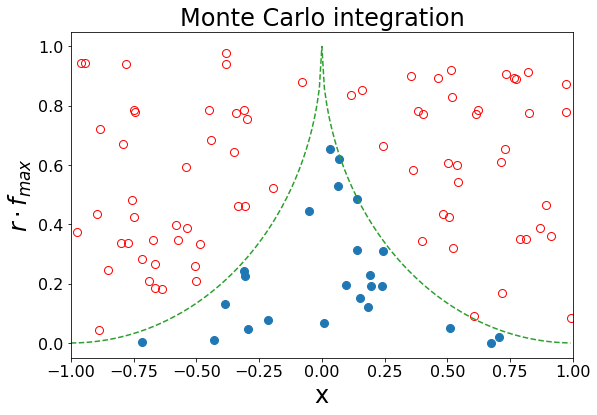

In [4]:
# Create result graph

plt.figure(figsize=(9, 6))

plt.plot(x_tab[w_tab],r_tab[w_tab],'o',markersize=8)
plt.plot(x_tab[w_tab==0],r_tab[w_tab==0],'o',markersize=8,markeredgecolor='red',fillstyle='none')

plt.title("Monte Carlo integration",size=24)
plt.xlabel('x',size=24)
plt.ylabel(r"$r \cdot f_{max}$",size=24)

# Add function

xfun = np.arange(-1.,1.,0.01)
yfun = mypdf(xfun)
plt.plot(xfun,yfun,'--')

plt.xlim([-1.,1.])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

fname = '05_generation.png'
plt.savefig(fname)

plt.show()

In [5]:
print('Generation efficiency: ',np.sum(w_tab)/Nmc)

Generation efficiency:  0.24


In [6]:
print('Expected efficiency: ',1.-np.pi/4.)

Expected efficiency:  0.21460183660255172
